### Process Overview:
- ##### Inputs: tfidf_vectors.csv
- ##### Outputs: Network

S1: Load and Preprocessed the Data

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Load the TF-IDF vectors from CSV
tfidf_100 = pd.read_csv('vectorized_tfidf_500.csv')

# Convert the Dataframe back to matrix
tfidf_matrix = csr_matrix(tfidf_100.values)


S2: Apply Topic Modeling

In [2]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
num_topics = 12

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_100)

# Get topic-word distribution and document-topic distribution
topic_word_dist = lda.components_
doc_topic_dist = lda.transform(tfidf_matrix)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


S3: Calculate Similarities

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate topic similarities based on word distributions
topic_similarities = cosine_similarity(topic_word_dist)

# Threshold for creating edges
similarity_threshold = 0.2

S4: Construct the Network

In [4]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for topics
for i in range(num_topics):
    G.add_node(f'Topic {i+1}', type='topic')

# Add edges based on topic similarities
for i in range(num_topics):
    for j in range(i + 1, num_topics):
        if topic_similarities[i, j] > similarity_threshold:
            G.add_edge(f'Topic {i+1}', f'Topic {j+1}', weight=topic_similarities[i, j])

# Optionally, add document nodes and edges to topics
for doc_index, doc in enumerate(doc_topic_dist):
    dominant_topic = np.argmax(doc)
    G.add_node(f'Doc {doc_index+1}', type='document')
    G.add_edge(f'Doc {doc_index+1}', f'Topic {dominant_topic+1}')

S5: Visualize the Network

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for topics
for i in range(num_topics):
    G.add_node(f'Topic {i+1}', type='topic')

# Add edges based on topic similarities
for i in range(num_topics):
    for j in range(i + 1, num_topics):
        if topic_similarities[i, j] > similarity_threshold:
            G.add_edge(f'Topic {i+1}', f'Topic {j+1}', weight=topic_similarities[i, j])

# Add document nodes and edges to topics
for doc_index, doc in enumerate(doc_topic_dist):
    dominant_topic = np.argmax(doc)
    G.add_node(f'Doc {doc_index+1}', type='document')
    G.add_edge(f'Doc {doc_index+1}', f'Topic {dominant_topic+1}')

# Debug: Print graph info
print("Nodes in the graph:", G.nodes(data=True))
print("Edges in the graph:", G.edges(data=True))

# Check if the graph is empty
if not G.nodes:
    print("The graph has no nodes.")
if not G.edges:
    print("The graph has no edges.")

Nodes in the graph: [('Topic 1', {'type': 'topic'}), ('Topic 2', {'type': 'topic'}), ('Topic 3', {'type': 'topic'}), ('Topic 4', {'type': 'topic'}), ('Topic 5', {'type': 'topic'}), ('Topic 6', {'type': 'topic'}), ('Topic 7', {'type': 'topic'}), ('Topic 8', {'type': 'topic'}), ('Topic 9', {'type': 'topic'}), ('Topic 10', {'type': 'topic'}), ('Topic 11', {'type': 'topic'}), ('Topic 12', {'type': 'topic'}), ('Doc 1', {'type': 'document'}), ('Doc 2', {'type': 'document'}), ('Doc 3', {'type': 'document'}), ('Doc 4', {'type': 'document'}), ('Doc 5', {'type': 'document'}), ('Doc 6', {'type': 'document'}), ('Doc 7', {'type': 'document'}), ('Doc 8', {'type': 'document'}), ('Doc 9', {'type': 'document'}), ('Doc 10', {'type': 'document'}), ('Doc 11', {'type': 'document'}), ('Doc 12', {'type': 'document'}), ('Doc 13', {'type': 'document'}), ('Doc 14', {'type': 'document'}), ('Doc 15', {'type': 'document'}), ('Doc 16', {'type': 'document'}), ('Doc 17', {'type': 'document'}), ('Doc 18', {'type': 'do

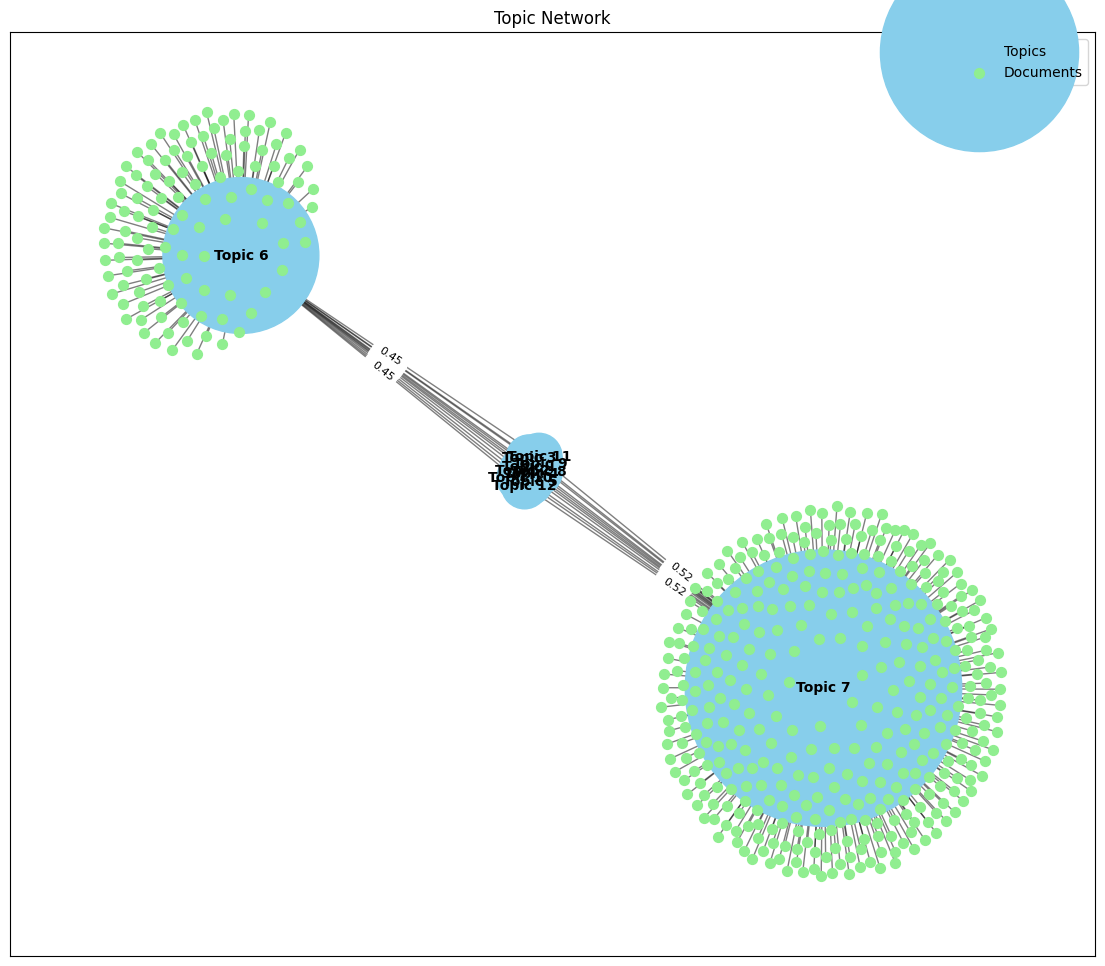

In [6]:
# Position nodes using a force-directed layout
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

# Separate topic and document nodes
topic_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'topic']
document_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'document']

# Draw the network
plt.figure(figsize=(14, 12))

# Draw topic nodes
nx.draw_networkx_nodes(G, pos, nodelist=topic_nodes, node_color='skyblue', node_size=[G.degree(node)*100 for node in topic_nodes], label='Topics')

# Draw document nodes
nx.draw_networkx_nodes(G, pos, nodelist=document_nodes, node_color='lightgreen', node_size=50, label='Documents')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels for topics only
nx.draw_networkx_labels(G, pos, labels={node: node for node in topic_nodes}, font_size=10, font_weight='bold')

# Draw edge labels for topic similarities
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True) if 'weight' in d}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add legend
plt.legend(scatterpoints=1, loc='best')

plt.title('Topic Network')
plt.show()